In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="whitegrid")

In [3]:
#load the dataset
data = pd.read_csv(r'E:\MatPlotLib-SeaBorn Project\Analyzing and Visualizing Sales Performance\data\sales_data.csv')

#inspect data
print(data.head())     #First Five Rows
print(data.info())     #Column data types and non-null counts
print(data.describe()) #Summary statistics

   OrderID   OrderDate     Product  Revenue  Cost  Quantity  CustomerID  \
0        1  2023-12-24  Headphones     4879  1303         5        3927   
1        2  2024-10-03        Desk     3236  3583         2        4983   
2        3  2024-09-07    Keyboard     4070   360        17        1897   
3        4  2024-11-19       Chair     4404  1985        10        2962   
4        5  2024-07-23  Headphones     1195   616         4        4614   

  Region OrderPriority  Discount     Category  Profit  
0  North      Critical         7  Electronics    3576  
1   East        Medium         9    Furniture    -347  
2  North           Low         5  Electronics    3710  
3  North           Low        27    Furniture    2419  
4   West           Low        20  Electronics     579  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OrderID       

In [8]:

# Create the 'Loss' column where negative profits are treated as losses
data['Loss'] = data['Profit'].apply(lambda x: -x if x < 0 else 0)
# Set negative values in 'Profit' to 0
data['Profit'] = data['Profit'].apply(lambda x: 0 if x < 0 else x)
#updating the 'Loss' column where negative profits are treated as losses only if Loss is not already populated
data['Loss'] = data.apply(lambda row: -row['Profit'] if row['Profit'] < 0 and row['Loss'] == 0 else row['Loss'], axis=1)

# Check the first few rows to verify the changes
print(data[['OrderID', 'Profit', 'Loss']].head())


# Check for missing values
print(data.isnull().sum())

# Fill missing values without inplace=True to avoid the warning
data['Revenue'] = data['Revenue'].fillna(data['Revenue'].mean())
data['Cost'] = data['Cost'].fillna(data['Cost'].mean())
data['Quantity'] = data['Quantity'].fillna(data['Quantity'].mean())

# Remove duplicate rows
data = data.drop_duplicates()

# Drop rows with missing values (if any)
data = data.dropna()

# Convert 'OrderDate' to datetime
data['OrderDate'] = pd.to_datetime(data['OrderDate'])

# Ensure that 'CustomerID' is treated as a categorical variable
data['CustomerID'] = data['CustomerID'].astype(str)

# Check the data types after the changes
print(data.dtypes)

#Handling Outliers
Q1 = data['Revenue'].quantile(0.25)
Q3 = data['Revenue'].quantile(0.75)
IQR = Q3-Q1

filtered_data = data[(data['Revenue']>=(Q1 - 1.5 * IQR)) & (data['Revenue']<=(Q3 + 1.5 * IQR))] # This will exclude any data points that are outside of the acceptable range based on the IQR.

# Check unique values in the 'Category' column
print(data['Category'].unique())

# Example: Remove invalid categories
valid_categories = ['Electronics', 'Furniture']
data = data[data['Category'].isin(valid_categories)]

# Check for missing values
print(f"Missing values after filling: \n{data.isnull().sum()}")
# Verify no duplicate rows exist
print(f"Duplicate rows: {data.duplicated().sum()}")
# Check data types
print(data.dtypes)
# Verify size before and after handling outliers
print(f"Original data size: {len(data)}")
print(f"Filtered data size: {len(filtered_data)}")
# Check unique values in 'Category' column after filtering
print(f"Valid categories after filtering: {data['Category'].unique()}")




   OrderID  Profit  Loss
0        1    3576     0
1        2       0   347
2        3    3710     0
3        4    2419     0
4        5     579     0
OrderID          0
OrderDate        0
Product          0
Revenue          0
Cost             0
Quantity         0
CustomerID       0
Region           0
OrderPriority    0
Discount         0
Category         0
Profit           0
Loss             0
dtype: int64
OrderID                   int64
OrderDate        datetime64[ns]
Product                  object
Revenue                   int64
Cost                      int64
Quantity                  int64
CustomerID               object
Region                   object
OrderPriority            object
Discount                  int64
Category                 object
Profit                    int64
Loss                      int64
dtype: object
['Electronics' 'Furniture']
Missing values after filling: 
OrderID          0
OrderDate        0
Product          0
Revenue          0
Cost             0
Quanti

In [10]:
# normalization for visualization
# Min-Max Normalization function
def min_max_normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Columns to normalize
columns_to_normalize = ['Revenue', 'Cost', 'Quantity']

# Apply Min-Max Normalization
for col in columns_to_normalize:
    data[col] = min_max_normalize(data[col])

# Check the normalized data
print(data[['Revenue', 'Cost', 'Quantity']].head())

# Check summary statistics to confirm the normalization
print(data[columns_to_normalize].describe())

    Revenue      Cost  Quantity
0  0.975753  0.320736  0.222222
1  0.643766  0.895188  0.055556
2  0.812285  0.083144  0.888889
3  0.879774  0.492567  0.500000
4  0.231360  0.147644  0.166667
            Revenue          Cost      Quantity
count  10000.000000  10000.000000  10000.000000
mean       0.494956      0.505719      0.503783
std        0.288996      0.287002      0.301342
min        0.000000      0.000000      0.000000
25%        0.246262      0.259196      0.222222
50%        0.489291      0.509322      0.500000
75%        0.741968      0.754409      0.777778
max        1.000000      1.000000      1.000000


In [11]:
# Check for any remaining missing values
print(data.isnull().sum())

# Check the data types and ranges for all columns
print(data.describe())  # This will give a quick summary of numerical columns

OrderID          0
OrderDate        0
Product          0
Revenue          0
Cost             0
Quantity         0
CustomerID       0
Region           0
OrderPriority    0
Discount         0
Category         0
Profit           0
Loss             0
dtype: int64
           OrderID                      OrderDate       Revenue          Cost  \
count  10000.00000                          10000  10000.000000  10000.000000   
mean    5000.50000  2024-06-09 04:21:12.960000256      0.494956      0.505719   
min        1.00000            2023-12-13 00:00:00      0.000000      0.000000   
25%     2500.75000            2024-03-10 00:00:00      0.246262      0.259196   
50%     5000.50000            2024-06-08 00:00:00      0.489291      0.509322   
75%     7500.25000            2024-09-08 00:00:00      0.741968      0.754409   
max    10000.00000            2024-12-12 00:00:00      1.000000      1.000000   
std     2886.89568                            NaN      0.288996      0.287002   

          

In [12]:
# Save the cleaned dataset to a new CSV
data.to_csv(r"E:\MatPlotLib-SeaBorn Project\Analyzing and Visualizing Sales Performance\outputs\saved_data.csv", index=False)

In [15]:
print(data.head())
print(data.info())

   OrderID  OrderDate     Product   Revenue      Cost  Quantity CustomerID  \
0        1 2023-12-24  Headphones  0.975753  0.320736  0.222222       3927   
1        2 2024-10-03        Desk  0.643766  0.895188  0.055556       4983   
2        3 2024-09-07    Keyboard  0.812285  0.083144  0.888889       1897   
3        4 2024-11-19       Chair  0.879774  0.492567  0.500000       2962   
4        5 2024-07-23  Headphones  0.231360  0.147644  0.166667       4614   

  Region OrderPriority  Discount     Category  Profit  Loss  
0  North      Critical         7  Electronics    3576     0  
1   East        Medium         9    Furniture       0   347  
2  North           Low         5  Electronics    3710     0  
3  North           Low        27    Furniture    2419     0  
4   West           Low        20  Electronics     579     0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         


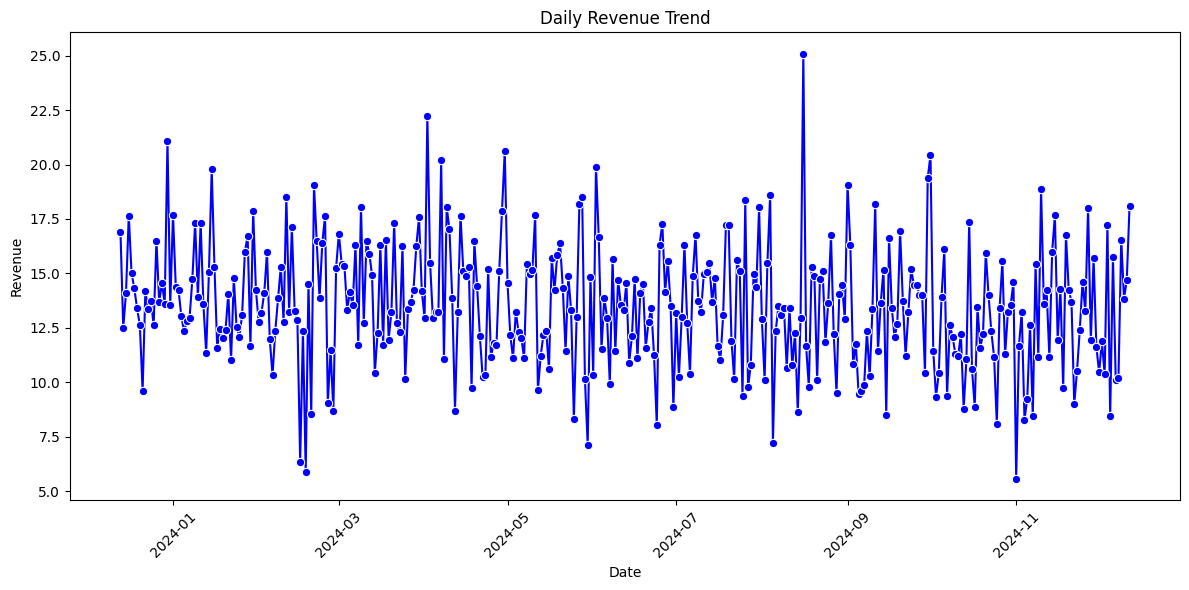

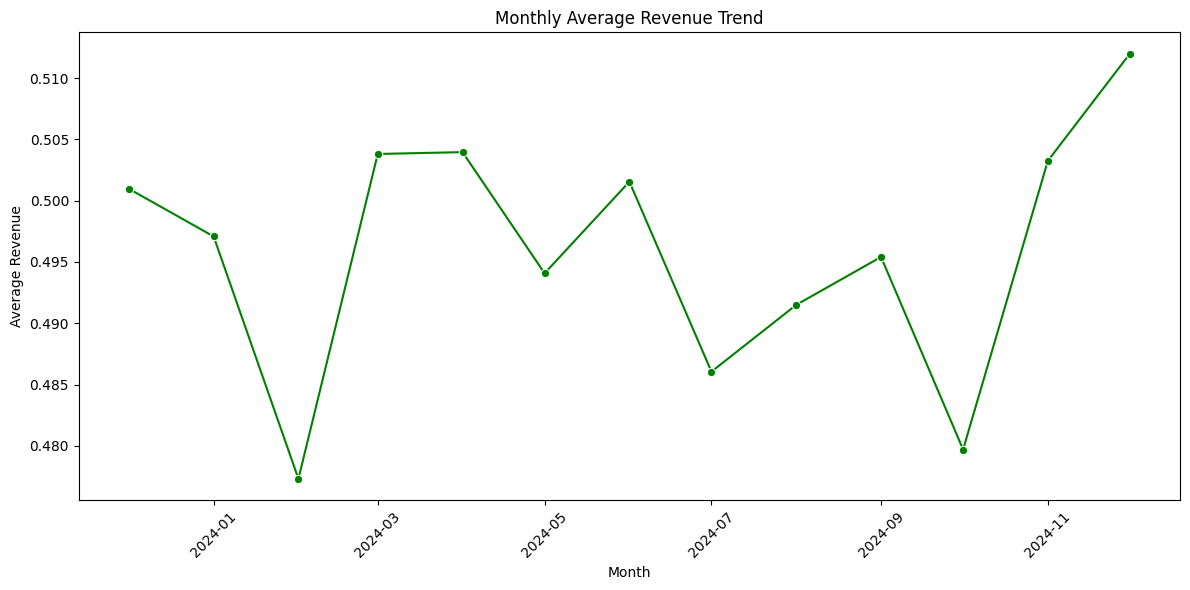

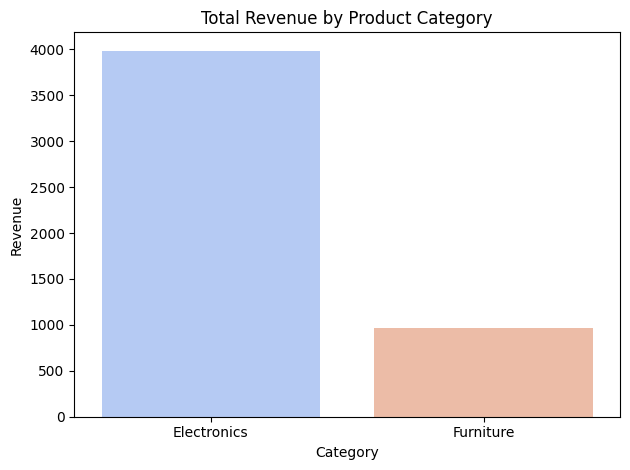

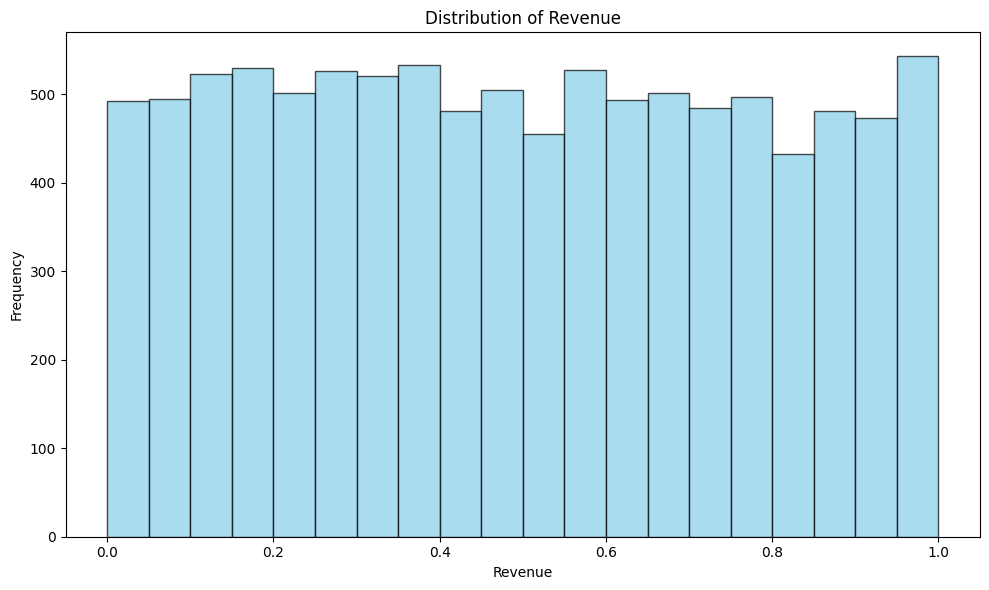

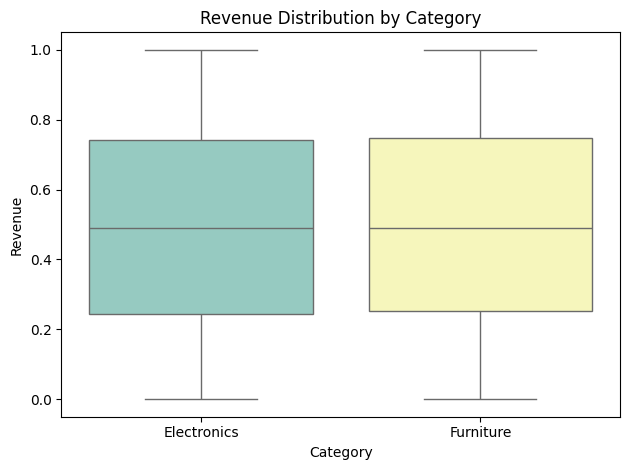

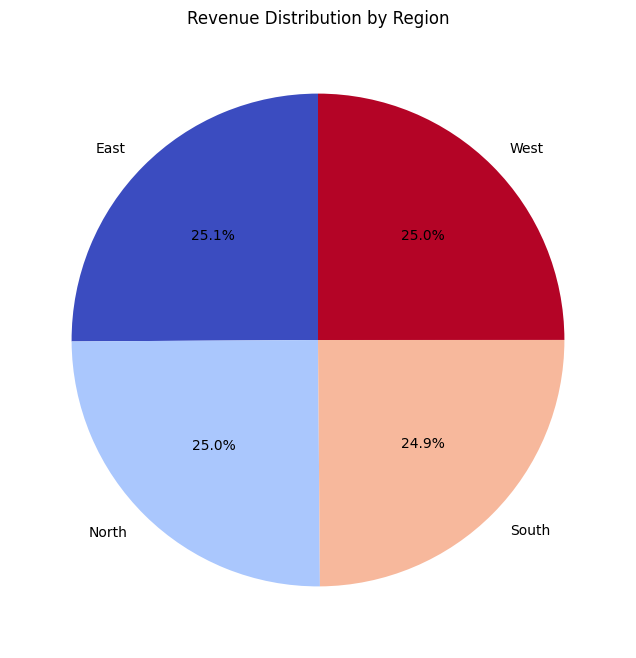

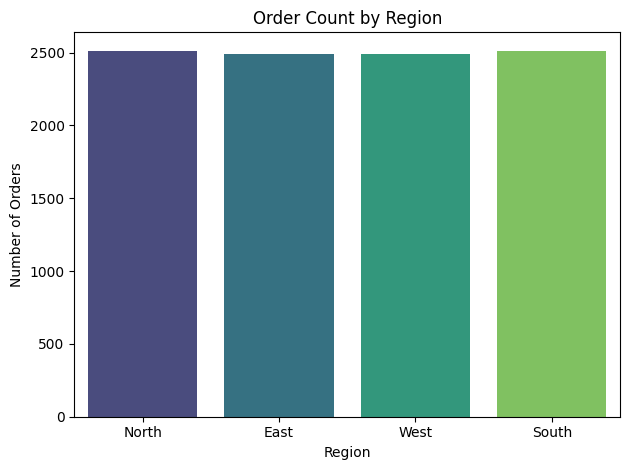

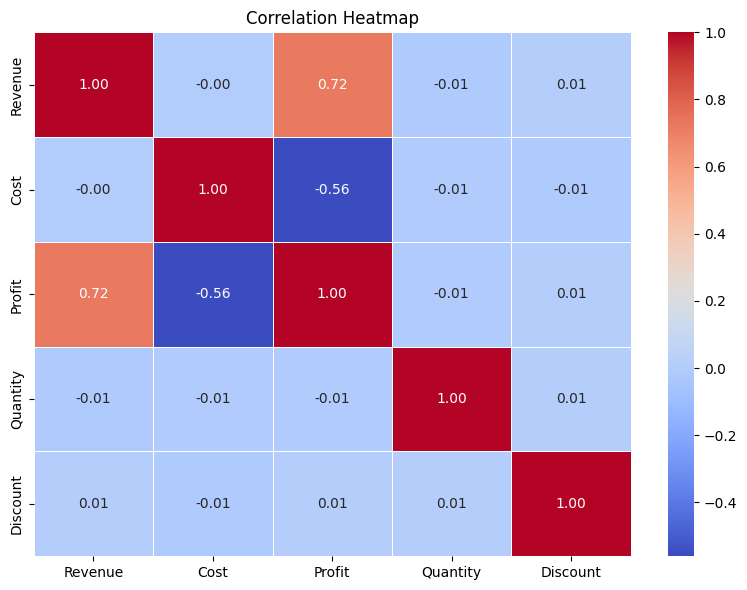

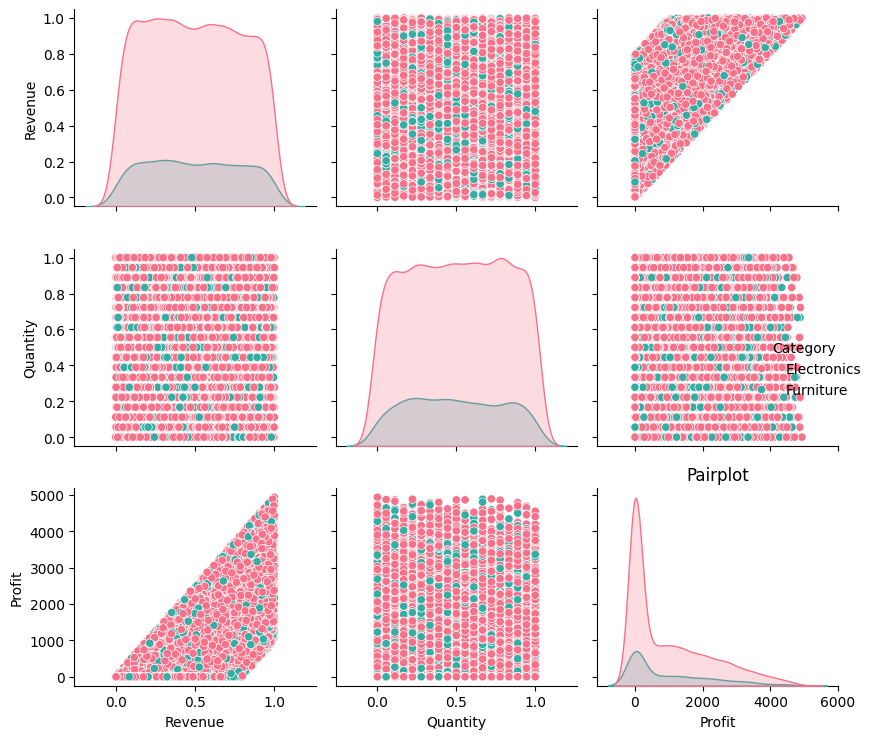

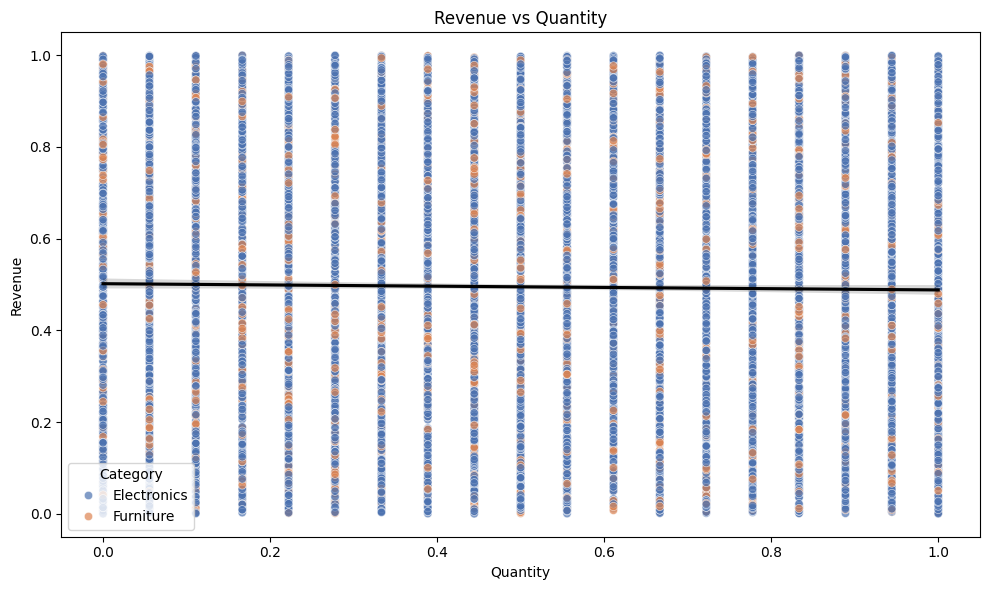

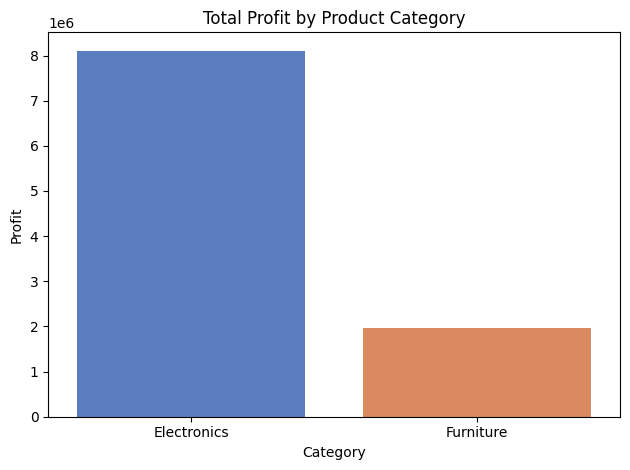

In [27]:
# NOW time for visualizations
output_folder = r"E:\MatPlotLib-SeaBorn Project\Analyzing and Visualizing Sales Performance\outputs\Visualizations"

#-Visualize Revenue Trends Over Time
#--Daily Revenue Trend
daily_revenue = data.groupby('OrderDate')['Revenue'].sum().reset_index()

# Plot daily revenue trend
plt.figure(figsize=(12,6))
sns.lineplot(x='OrderDate', y='Revenue',data=daily_revenue, marker = 'o', color='blue')
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{output_folder}/daily_revenue-trend-lineplot.jpg",format='jpg', dpi=300 ,bbox_inches='tight')
plt.show()

#Monthly Revenue Trend

# Extract Year-Month and convert to string format
data['Month'] = data['OrderDate'].dt.to_period('M').astype(str)

# Group by Month and calculate average Revenue
monthly_revenue = data.groupby('Month')['Revenue'].mean().reset_index()

# Sort by Month (optional, for proper chronological order)
monthly_revenue['Month'] = pd.to_datetime(monthly_revenue['Month'])
monthly_revenue = monthly_revenue.sort_values(by='Month')

# Plot monthly revenue trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Revenue', data=monthly_revenue, marker='o', color='green')
plt.title("Monthly Average Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Average Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{output_folder}/monthly_revenue-trend-lineplot.jpg",format='jpg', dpi=300 ,bbox_inches='tight')
plt.show()

#Compare Sales by Product Category

#--Bar Chart for Revenue by Category

# ---Group by Category and calculate total Revenue
category_revenue  = data.groupby('Category')['Revenue'].sum().reset_index()

#----Bar chart
sns.barplot(
    x='Category', 
    y='Revenue', 
    data=category_revenue, 
    hue='Category',  # Assign 'Category' to hue
    palette='coolwarm', 
    dodge=False  # Keep bars from being split by hue
)
plt.title("Total Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.legend([], [], frameon=False)  # Optional: Remove legend if not needed
plt.tight_layout()
plt.savefig(f"{output_folder}/total_revenue_by_product_category_barplot.jpg",format='jpg', dpi=300 ,bbox_inches='tight')
plt.show()


#Analyze Revenue and Quantity Distributions
#-Histogram of Revenue
plt.figure(figsize=(10, 6))
plt.hist(data['Revenue'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(f"{output_folder}/Histogram of Revenue.jpg",format='jpg', dpi=300 ,bbox_inches='tight')
plt.show()

#--Box Plot of Revenue by Category
sns.boxplot(
    x='Category', 
    y='Revenue', 
    data=data, 
    hue='Category',  # Assign 'Category' to hue
    palette='Set3'
)
plt.title("Revenue Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.legend([], [], frameon=False)  # Optional: Remove legend if not needed
plt.tight_layout()
plt.savefig(f"{output_folder}/Boxplot_Revenue Distribution by Category.jpg",format='jpg', dpi=300 ,bbox_inches='tight')
plt.show()

# Regional Performance Analysis
#-Pie Chart for Revenue by Region
#--# Group by Region and calculate total Revenue
region_revenue = data.groupby('Region')['Revenue'].sum()

#---Pie chart
plt.figure(figsize=(8, 8))
region_revenue.plot(kind = 'pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm')
plt.title("Revenue Distribution by Region")
plt.ylabel("")  # Remove default ylabel
plt.savefig(f"{output_folder}/pie_chart_Revenue Distribution by Region.jpg",format='jpg', dpi=300 ,bbox_inches='tight')
plt.show()

#-Order Count by Region
#--Count the number of orders in each Region - Countplot
sns.countplot(
    x='Region', 
    data=data, 
    hue='Region',  # Assign 'Region' to hue
    palette='viridis'
)
plt.title("Order Count by Region")
plt.xlabel("Region")
plt.ylabel("Number of Orders")
plt.legend([], [], frameon=False)  # Optional: Remove legend if not needed
plt.tight_layout()
plt.savefig(f"{output_folder}/countplot_Order Count by Region.jpg",format='jpg', dpi=300 ,bbox_inches='tight')
plt.show()

#Correlation Analysis
#-Correlation Heatmap
#--# Select relevant columns
corr_matrix = data[['Revenue', 'Cost', 'Profit', 'Quantity', 'Discount']].corr()

#---Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig(f"{output_folder}/Correlation_Heatmap.jpg",format='jpg', dpi=300 ,bbox_inches='tight')
plt.show()
#---Pair Plot
#----# Pairplot for Revenue, Quantity, and Profit
sns.pairplot(data[['Revenue', 'Quantity', 'Profit', 'Category']], hue='Category', palette='husl')
plt.title("Pairplot")
plt.tight_layout()
plt.savefig(f"{output_folder}/Pairplot for Revenue, Quantity, and Profit.jpg",format='jpg', dpi=300 ,bbox_inches='tight')
plt.show()

# Advanced Scatter Plot with Trendline
#-Revenue vs Quantity
#--Scatter plot of Revenue vs Quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Revenue', data=data ,hue='Category' ,palette='deep', alpha=0.7)

# Add a trendline
sns.regplot(x='Quantity', y='Revenue', data=data, scatter=False ,color='black')
plt.title("Revenue vs Quantity")
plt.xlabel("Quantity")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig(f"{output_folder}/advanced_scatter_plot_of Revenue vs Quantity.jpg",format='jpg', dpi=300 ,bbox_inches='tight')
plt.show()

#Profitability Analysis
#-Bar Chart for Profit by Category
#--# Group by Category and calculate total Profit
category_profit = data.groupby('Category')['Profit'].sum().reset_index()
#---Bar chart for Profit
sns.barplot(
    x='Category', 
    y='Profit', 
    data=category_profit, 
    hue='Category',  # Assign 'Category' to hue
    palette='muted', 
    dodge=False  # Prevent splitting bars by hue
)
plt.title("Total Profit by Product Category")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.legend([], [], frameon=False)  # Remove legend (optional)
plt.tight_layout()
plt.savefig(f"{output_folder}/bar_chart_for_profit_by_category.jpg",format='jpg', dpi=300 ,bbox_inches='tight')
plt.show()
